# 8m 2023

Spatial data analysis of sociodemographic variables for 2023's 8m.

## Import labraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import esda
import pysal

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


2023-01-10 15:20:59 Configured OSMnx 1.1.2
2023-01-10 15:20:59 HTTP response caching is on


## Download data

### Municipality polygons

In [4]:
mun_schema = 'metropolis'
mun_folder = 'metro_gdf'

city = 'Guadalajara'

query = f"SELECT * FROM {mun_schema}.{mun_folder} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


### AGEB population data

In [5]:
cvegeo_list = list(mun_gdf.loc[mun_gdf.city==city]["CVEGEO"].unique())

In [6]:
# donwload hexagons with pop data
hex_pop = gpd.GeoDataFrame()
hex_folder = 'hex_bins_pop_2020'
hex_schema = 'censo'


# Iterates over municipality codes for each metropolitan area or capital
for cvegeo in cvegeo_list:
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"CVEGEO\" LIKE \'{cvegeo}%%\'"
    hex_tmp = aup.gdf_from_query(query, geometry_col='geometry')
    hex_pop = pd.concat([hex_pop, hex_tmp],
    ignore_index = True, axis = 0)
print(hex_pop.shape)
hex_pop.head(2)

(1187, 225)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,135.64044,137.528090,13.123595,6.831461,6.292135,260.044950,...,13.662921,66.06741,34.426968,56.808990,9.168539,7.011236,2.067416,4.134831,33.348316,0.539326
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,98.333336,46.00000,43.333332,4.666666,2.333333,2.333333,84.666664,...,3.000000,22.00000,11.000000,18.666666,3.000000,2.000000,0.000000,0.000000,9.333333,0.000000


### Marginalization data

In [7]:
# donwload hexagons with pop data
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
hex_schema = 'censo'


# Iterates over municipality codes for each metropolitan area or capital
for cvegeo in cvegeo_list:
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"CVEGEO\" LIKE \'{cvegeo}%%\'"
    hex_tmp = aup.gdf_from_query(query, geometry_col='geometry')
    hex_marg = pd.concat([hex_marg, hex_tmp],
    ignore_index = True, axis = 0)
print(hex_marg.shape)
hex_marg.head(2)

(1163, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,0.029676,0.697379,4.282201,0.593514,2.756871,120.556725,0.941744
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,0.000000,1.492537,15.049751,0.373134,8.333333,122.339516,0.955670


## Data treatment

Composition variable for segregation analysis

In [8]:
hex_pop['jef_fem_compo'] = np.where(hex_pop['tothog'] == 0, 0, hex_pop['hogjef_f'] / hex_pop['tothog'])
hex_pop.head(2)

,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,jef_fem_compo
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,135.64044,137.528090,13.123595,6.831461,6.292135,260.044950,...,66.06741,34.426968,56.808990,9.168539,7.011236,2.067416,4.134831,33.348316,0.539326,0.318804
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,98.333336,46.00000,43.333332,4.666666,2.333333,2.333333,84.666664,...,22.00000,11.000000,18.666666,3.000000,2.000000,0.000000,0.000000,9.333333,0.000000,0.191176


(-103.6846859853608,
 -103.00535604172013,
 20.30522620534624,
 20.895293154199003)

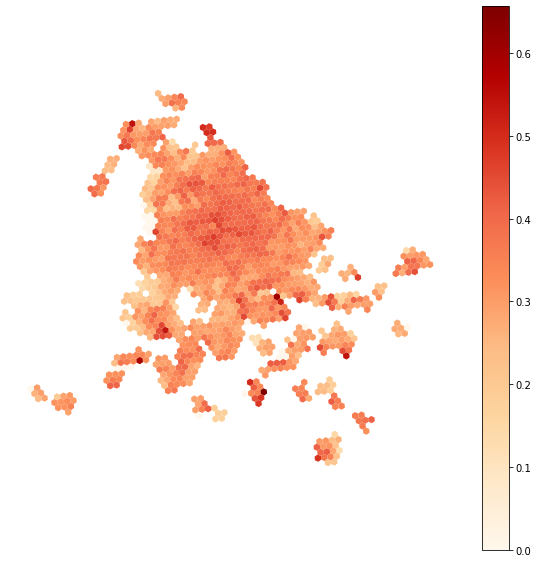

In [9]:
hex_pop.plot(column = 'jef_fem_compo', figsize = (10, 10), cmap = 'OrRd', legend = True)
plt.axis('off')

### Merge data

In [10]:
hex_pop = hex_pop.merge(hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')

### Calculate margninalization index

In [11]:
hex_pop['Grado_Marg'] = np.nan
hex_pop.loc[hex_pop.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_pop.loc[(hex_pop.imn_2020>=0.946436 )&
             (hex_pop.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_pop.loc[(hex_pop.imn_2020>=0.926536)&
             (hex_pop.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_pop.loc[(hex_pop.imn_2020>=0.8999)&
             (hex_pop.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_pop.loc[hex_pop.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

In [12]:
from pandas.api.types import CategoricalDtype

In [13]:
#categorical data
cat_list = ['Muy bajo','Bajo','Medio','Alto', 'Muy alto']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_pop['Grado_Marg'] = hex_pop['Grado_Marg'].astype(cat_size_order)
hex_pop = hex_pop.sort_values('Grado_Marg')

## Data analysis

### Dissimilarity

In [27]:
from segregation.singlegroup import Dissim

index = Dissim(hex_pop, 'hogjef_f', 'tothog')

type(index)

segregation.singlegroup.dissim.Dissim

In [28]:
index.statistic

0.08775077314265306

### Spatial segregation indices

In [14]:
from segregation.singlegroup import AbsoluteCentralization, Gini

In [17]:
hex_pop = hex_pop.to_crs("EPSG:6372")

In [18]:
cent = AbsoluteCentralization(hex_pop, group_pop_var='hogjef_f', 
                              total_pop_var='tothog')

cent.statistic

0.26330551625613907

### Euclidian distance based

In [19]:
# aspatial gini index
aspatial_gini = Gini(hex_pop, group_pop_var='hogjef_f', 
                              total_pop_var='tothog')

In [20]:
aspatial_gini.statistic

0.12138771865004756

In [21]:
# generalized spatial gini index
gen_spatialgini = Gini(hex_pop, group_pop_var='hogjef_f', 
                              total_pop_var='tothog', distance=2000)

In [22]:
gen_spatialgini.statistic

0.09350394840199161

<AxesSubplot: >

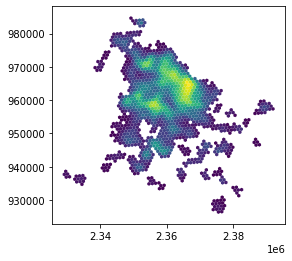

In [24]:
gen_spatialgini.data.plot('hogjef_f')

<AxesSubplot: >

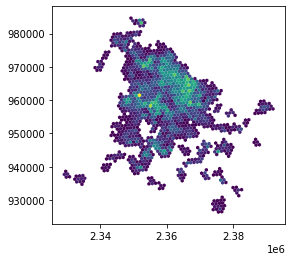

In [25]:
hex_pop.plot('hogjef_f')

### Correlation

In [39]:
x = np.array(hex_pop.imn_2020)
y = np.array(hex_pop.jef_fem_compo)
np.corrcoef(x, y)

array([[ 1.        , -0.05751652],
       [-0.05751652,  1.        ]])

(0.9, 1.0)

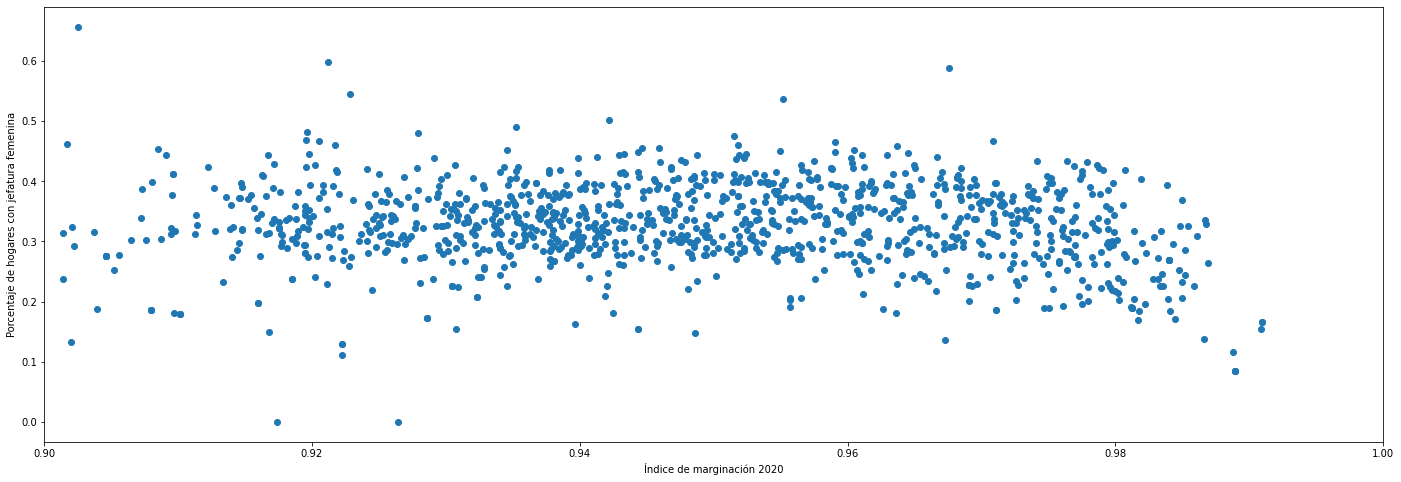

In [43]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_pop.imn_2020, hex_pop.jef_fem_compo)

plt.xlabel('Índice de marginación 2020')
plt.ylabel('Porcentaje de hogares con jefatura femenina')

ax.set_xlim([0.9, 1])

Text(0, 0.5, 'Porcentaje de hogares con jefatura femenina')

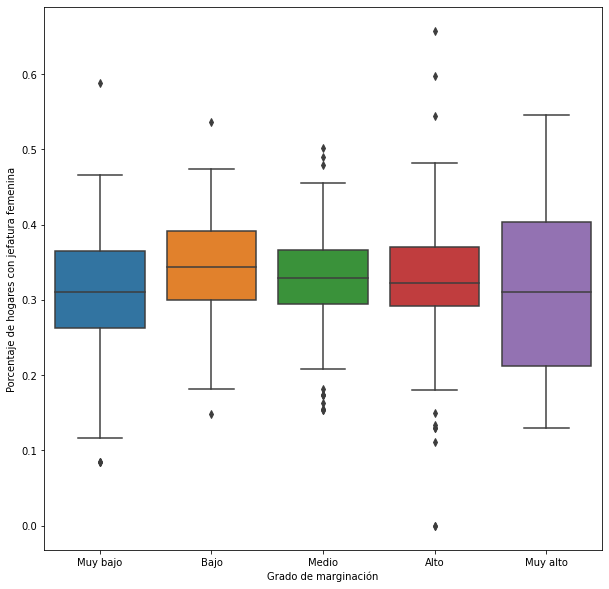

In [44]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_pop.Grado_Marg) , y=np.array(hex_pop.jef_fem_compo), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Porcentaje de hogares con jefatura femenina')